In [2]:
import numpy as np
import pandas as pd

In [3]:
iris=pd.read_csv("C:\\Users\\dharanishwar\\OneDrive\\Desktop\\Internship\\Oasis\\Task 1\\Iris.csv")

In [4]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
target = []

for i in range(len(iris['Species'])):
    if iris['Species'][i] == 'Iris-setosa':
        target.append("0")
    elif iris['Species'][i] == 'Iris-versicolor':
        target.append('1')
    else:
        target.append('2')


iris['target'] = target

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [9]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [18]:
import matplotlib.pyplot as plt

setosa = iris[iris.Species == "Iris-setosa"]
versicolor = iris[iris.Species=='Iris-versicolor']
virginica = iris[iris.Species=='Iris-virginica']



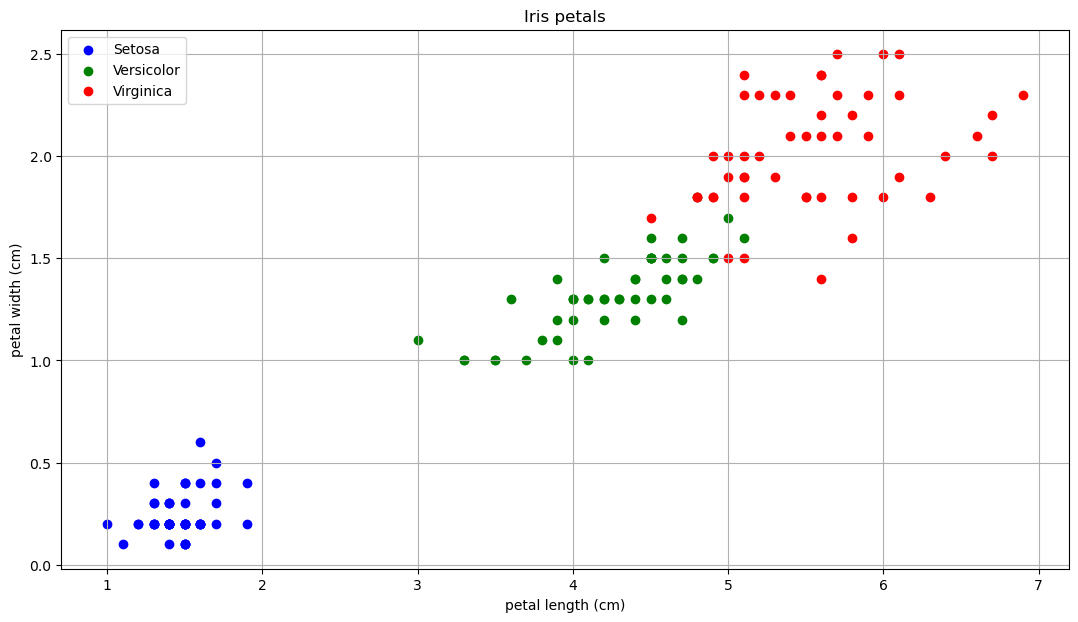

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot
ax.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [21]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','Species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
training_prediction = log_reg.predict(X_train)
training_prediction

array(['1', '2', '1', '0', '1', '2', '0', '0', '1', '2', '0', '2', '0',
       '0', '1', '1', '2', '2', '2', '2', '1', '0', '0', '2', '2', '0',
       '0', '0', '1', '2', '0', '2', '2', '0', '1', '1', '1', '1', '2',
       '0', '2', '1', '2', '1', '1', '1', '0', '1', '1', '0', '1', '2',
       '2', '0', '1', '2', '2', '0', '2', '0', '2', '2', '2', '1', '2',
       '1', '1', '1', '2', '0', '1', '1', '0', '1', '2'], dtype=object)

In [24]:
test_prediction = log_reg.predict(X_test)
test_prediction

array(['1', '0', '2', '1', '1', '0', '1', '2', '1', '1', '2', '0', '0',
       '0', '0', '1', '2', '1', '1', '2', '0', '2', '0', '2', '2', '2',
       '2', '2', '0', '0', '0', '0', '1', '0', '0', '2', '1', '0', '0',
       '0', '2', '1', '1', '0', '0', '1', '2', '2', '1', '2', '1', '2',
       '1', '0', '2', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '2', '0', '1', '2', '0', '1', '2', '1'], dtype=object)

In [25]:
from sklearn import metrics
# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.889     0.889     0.889        27
           2      0.889     0.889     0.889        27

    accuracy                          0.920        75
   macro avg      0.926     0.926     0.926        75
weighted avg      0.920     0.920     0.920        75

[[21  0  0]
 [ 0 24  3]
 [ 0  3 24]]


In [26]:
print(metrics.classification_report(y_test, test_prediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        29
           1      0.920     1.000     0.958        23
           2      1.000     0.913     0.955        23

    accuracy                          0.973        75
   macro avg      0.973     0.971     0.971        75
weighted avg      0.975     0.973     0.973        75



In [27]:
print(metrics.confusion_matrix(y_test, test_prediction))

[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
